In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
data = pd.read_csv("pima-indians-diabetes.csv", names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])


In [22]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
data.duplicated().sum()

0

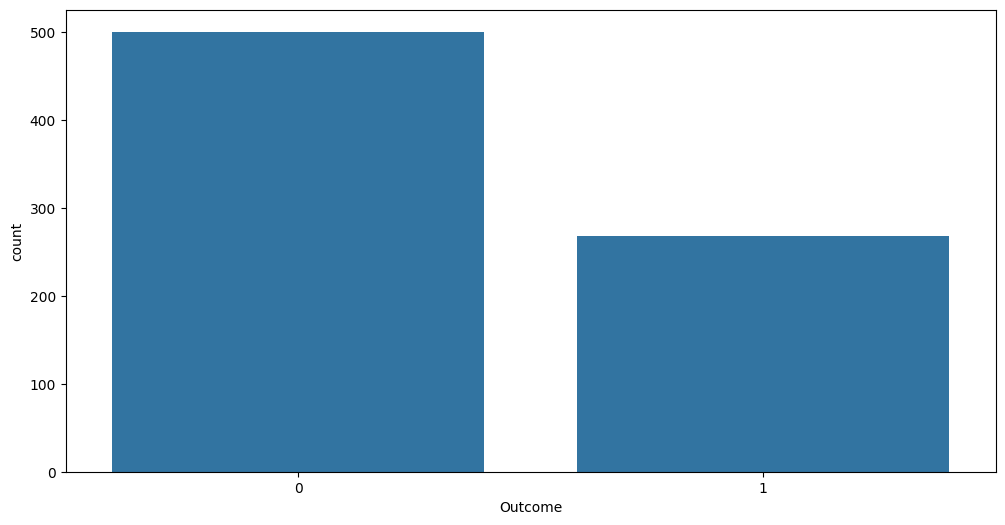

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome', data=data)
plt.savefig('outcome_count.pdf', format='pdf', bbox_inches='tight')
plt.savefig('outcome_count.png', format='png', bbox_inches='tight')
plt.show()

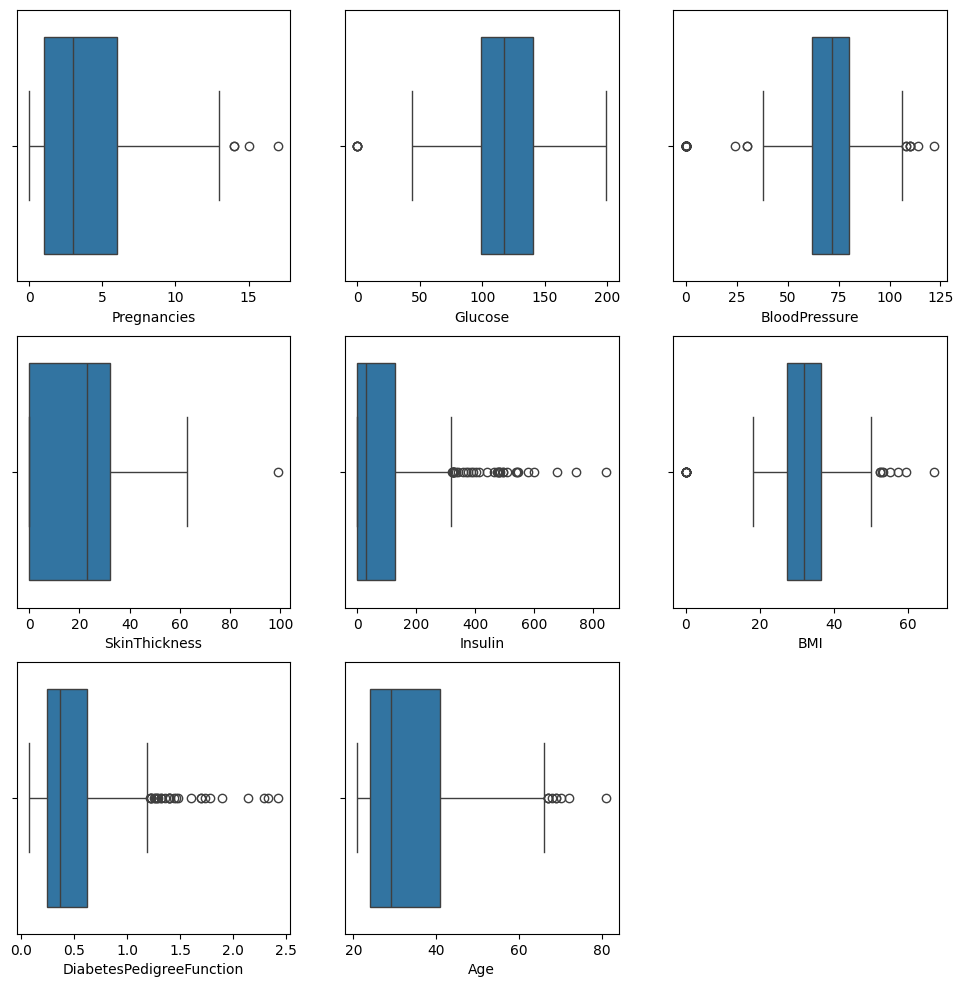

In [28]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=data)
plt.savefig('boxplots.pdf', format='pdf', bbox_inches='tight')
plt.savefig('boxplots.png', format='png', bbox_inches='tight')
plt.show()

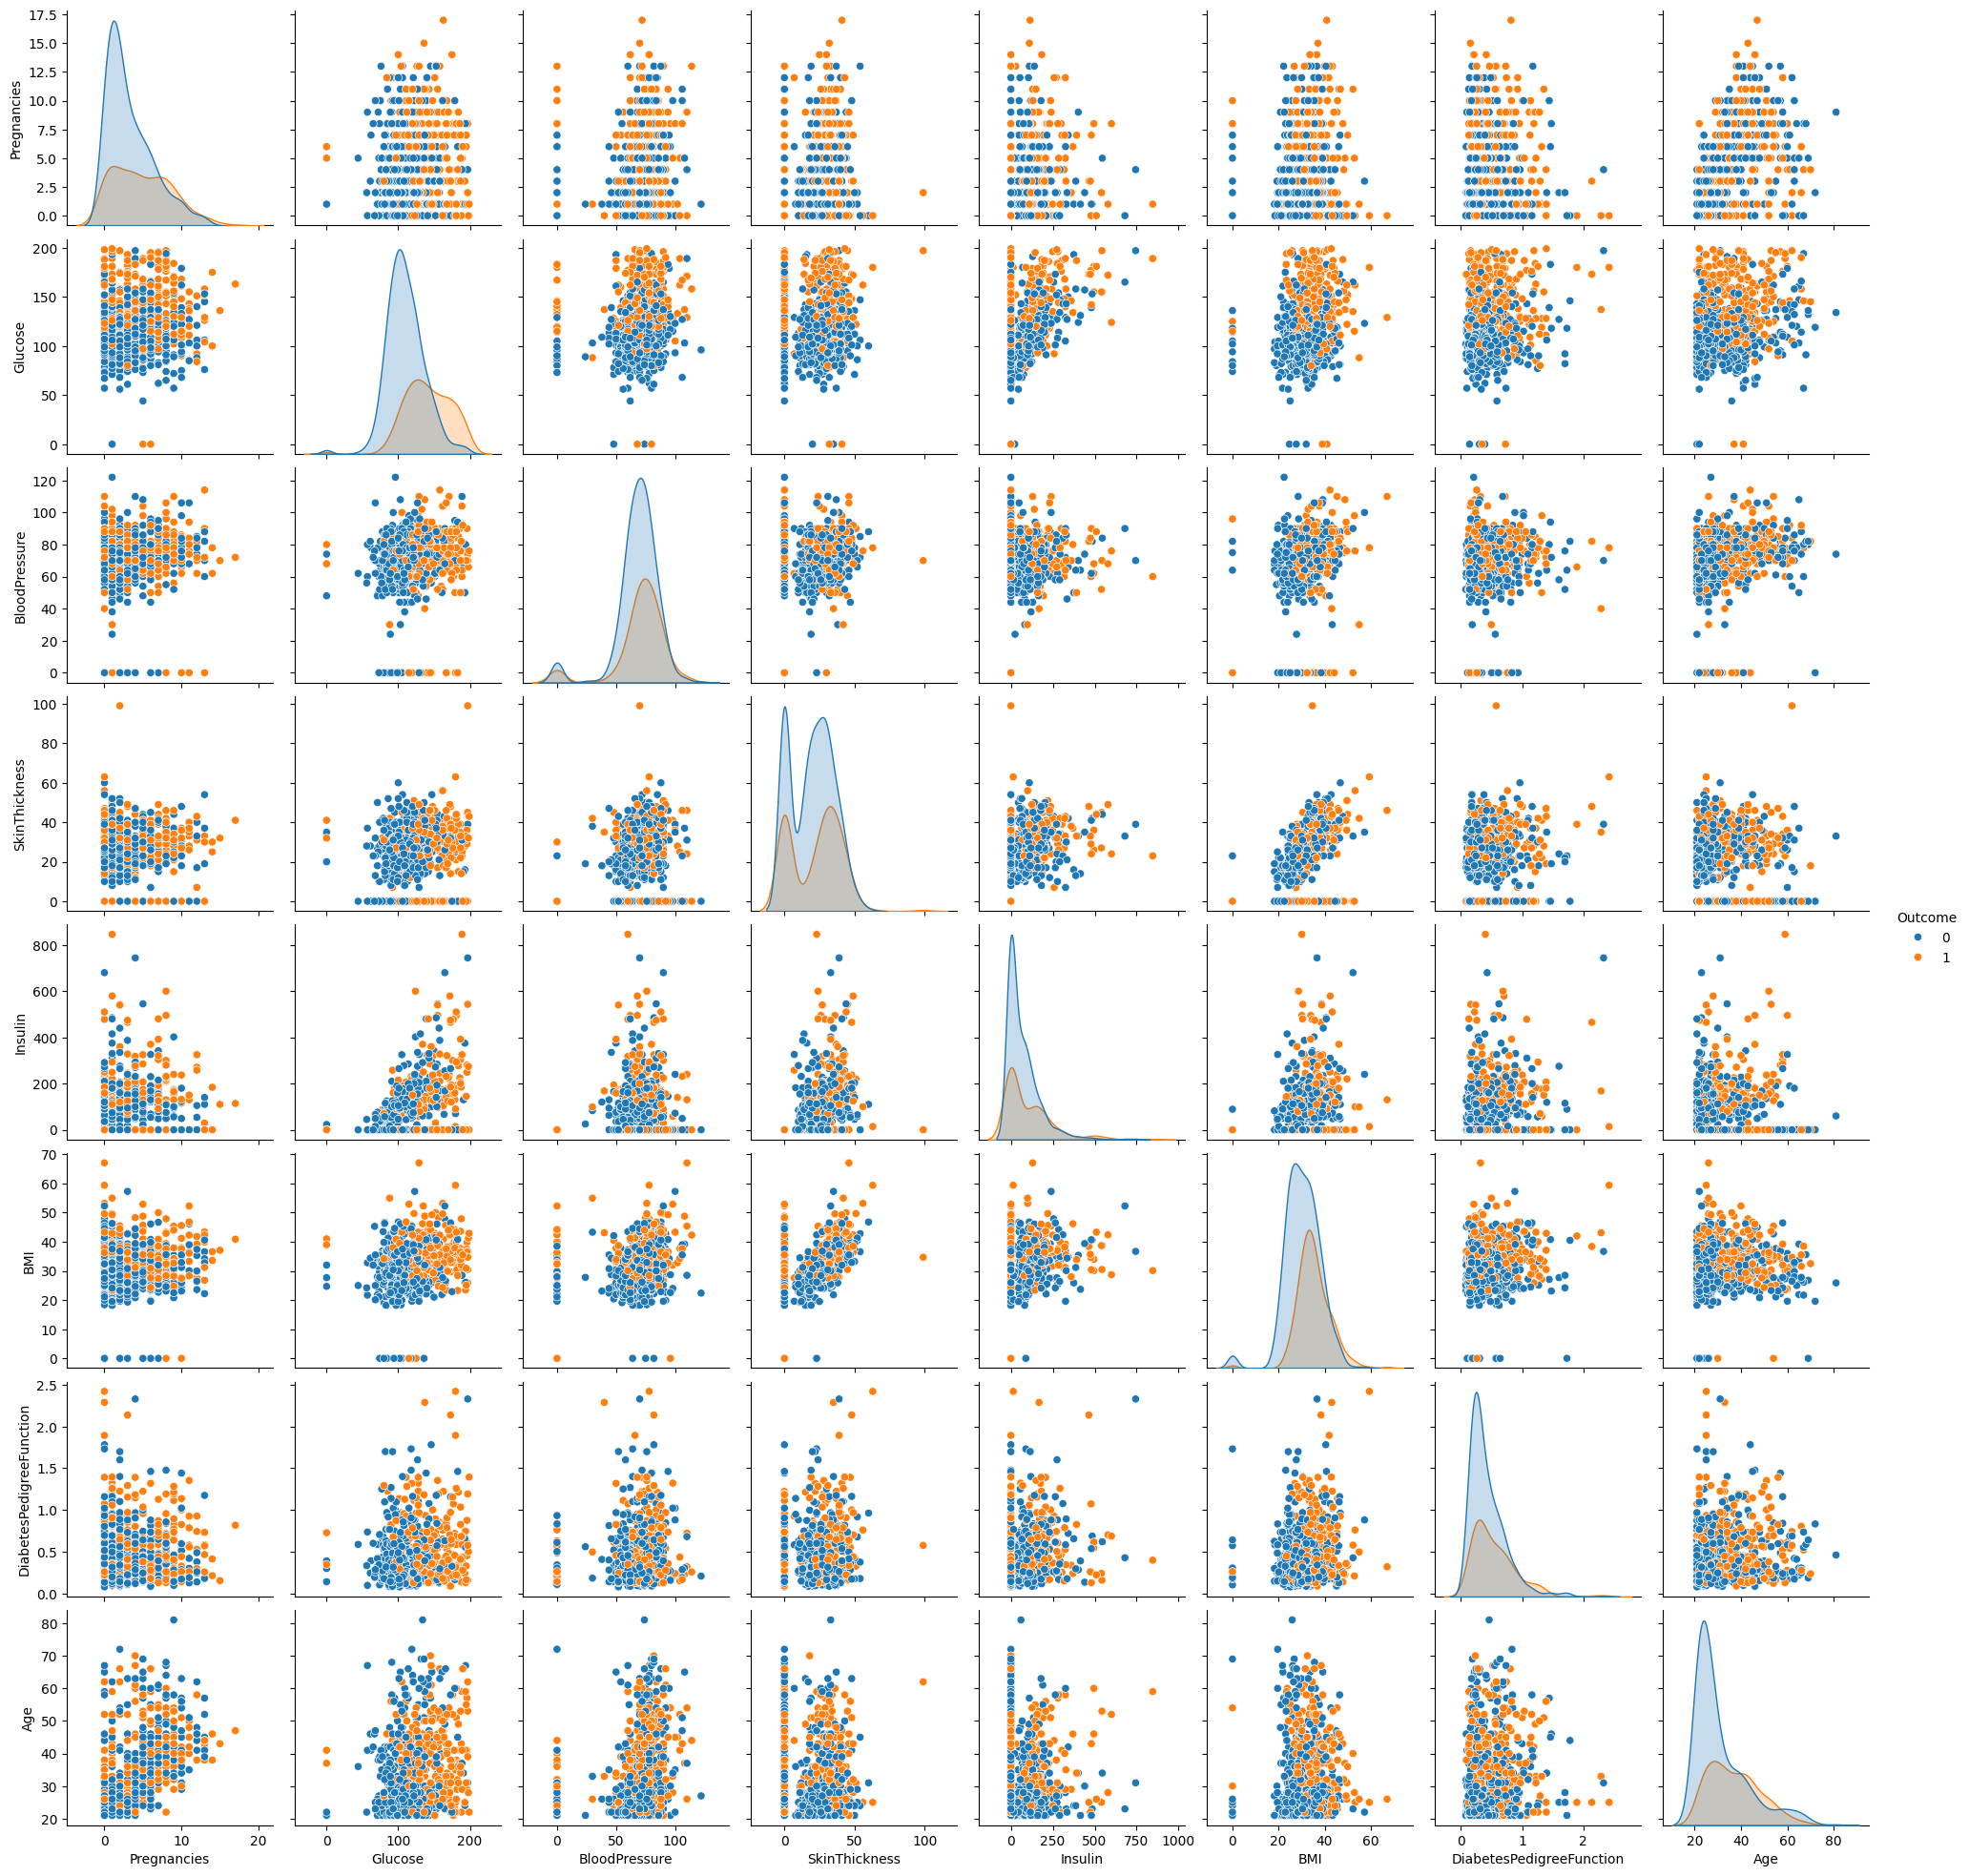

In [29]:
sns.pairplot(data, hue='Outcome')
plt.savefig('pairplot.pdf', format='pdf', bbox_inches='tight')
plt.savefig('pairplot.png', format='png', bbox_inches='tight')
plt.show()

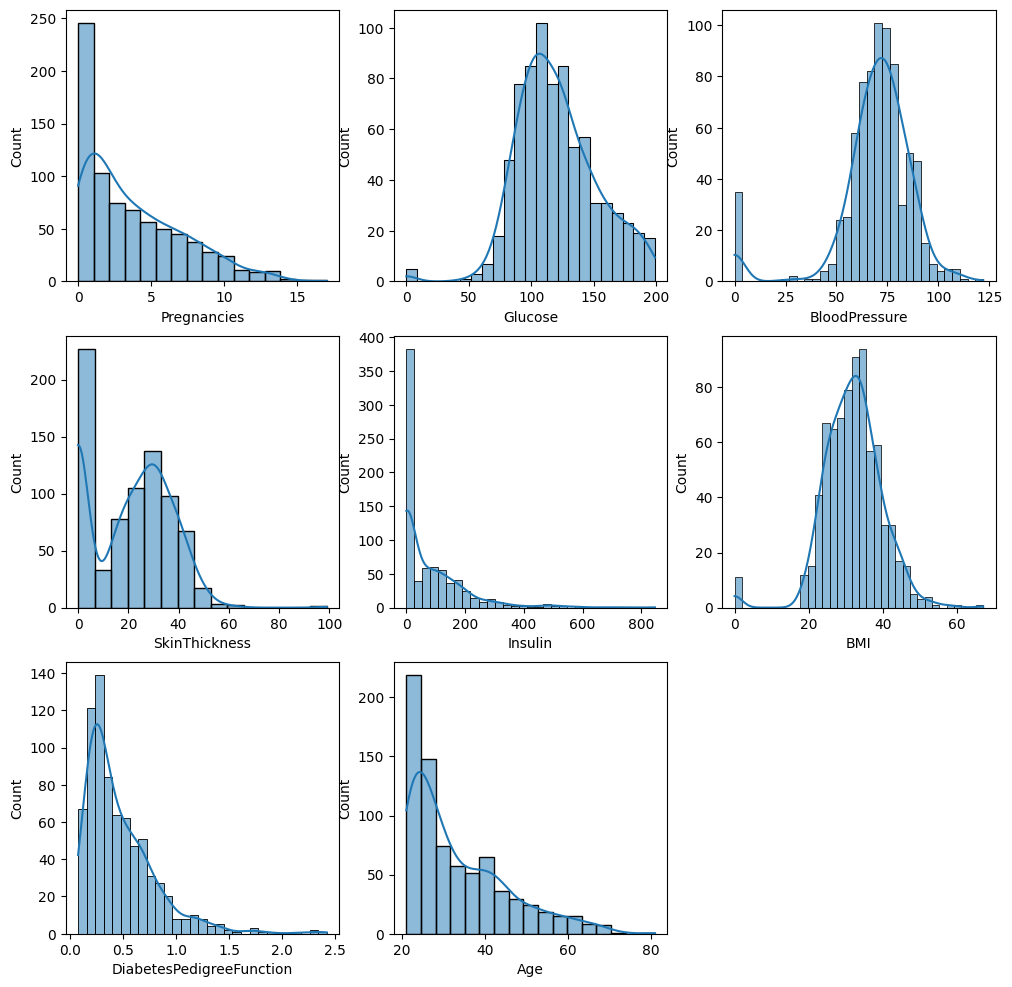

In [30]:
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=data, kde=True)
plt.savefig('histplot.pdf', format='pdf', bbox_inches='tight')
plt.savefig('histplot.png', format='png', bbox_inches='tight')
plt.show()

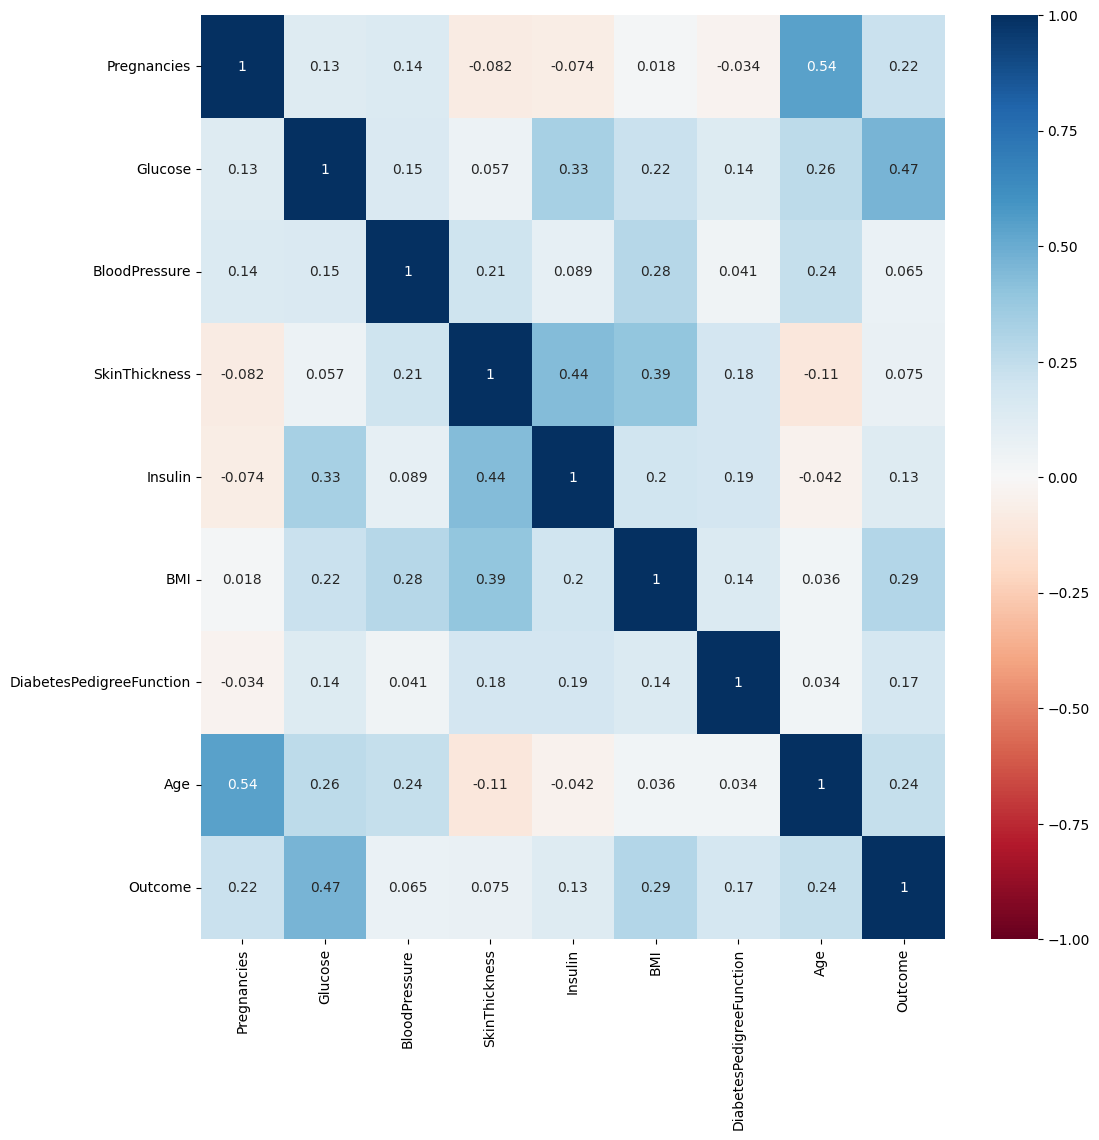

In [31]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1.0, center=0, cmap='RdBu', annot=True)
plt.savefig('heatmap.pdf', format='pdf', bbox_inches='tight')
plt.savefig('heatmap.png', format='png', bbox_inches='tight')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = pd.DataFrame(sc_x.fit_transform(data.drop('Outcome', axis=1),),
                 columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age '])

In [33]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction      Age   
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [34]:
y = data['Outcome']

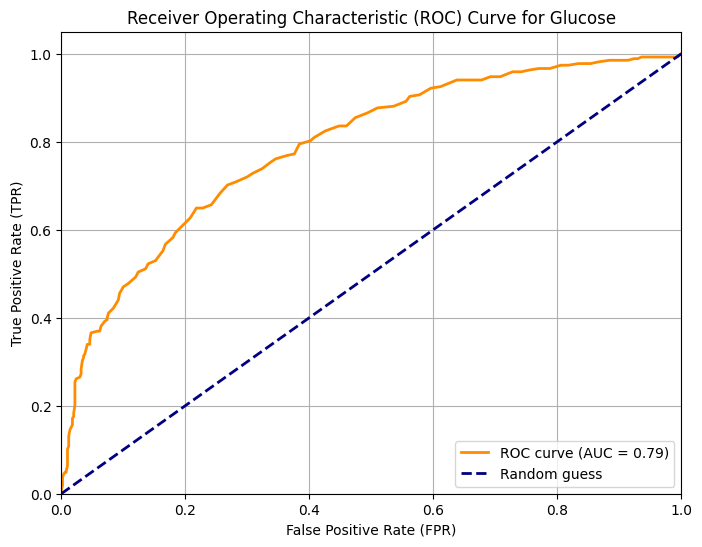

Ngưỡng tối ưu: 0.34


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

X = data[['Glucose']]  # Sử dụng Glucose làm predictor
y = data['Outcome']    # Biến mục tiêu (0 hoặc 1)

# Bước 4: Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Bước 5: Dự đoán xác suất (probability scores)
y_prob = model.predict_proba(X)[:, 1]  # Lấy xác suất lớp 1

# Bước 6: Tính toán ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)  # False Positive Rate, True Positive Rate, Thresholds
roc_auc = auc(fpr, tpr)  # Tính Area Under Curve (AUC)

# Bước 7: Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Glucose')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.pdf', format='pdf', bbox_inches='tight')
plt.savefig('roc_curve.png', format='png', bbox_inches='tight')
plt.show()

# Bước 8: Tìm ngưỡng tối ưu (Youden's Index)
optimal_idx = np.argmax(tpr - fpr)  # Chọn ngưỡng nơi Youden's Index (tpr - fpr) lớn nhất
optimal_threshold = thresholds[optimal_idx]
print(f'Ngưỡng tối ưu: {optimal_threshold:.2f}')